# DESAFIOS Aula 1

## Base para os desafios


In [0]:
# Base da Aula 4
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%precision %.2f

pd.options.display.float_format = '{:,.2f}'.format
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]

avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]

notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")

## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.


In [2]:
filmes_com_media[filmes_com_media['nota'].isnull()]

filmeId  ... nota
816      1076  ...  nan
2211     2939  ...  nan
2499     3338  ...  nan
2587     3456  ...  nan
3118     4194  ...  nan
4037     5721  ...  nan
4506     6668  ...  nan
4598     6849  ...  nan
4704     7020  ...  nan
5020     7792  ...  nan
5293     8765  ...  nan
5421    25855  ...  nan
5452    26085  ...  nan
5749    30892  ...  nan
5824    32160  ...  nan
5837    32371  ...  nan
5957    34482  ...  nan
7565    85565  ...  nan

[18 rows x 4 columns]

**isnull** - Retorne um objeto do mesmo tamanho booleano indicando se os valores são zerados.

Podemos utilizar o resultado do **isnull** como condição diretamente como índice do dataframe para fazer o filtro de valores zerados

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html?highlight=isnull#pandas.DataFrame.isnull




## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

In [3]:
filmes_com_media.rename(columns={"nota": "media"})
filmes_com_media.head()

filmeId  ... nota
0        1  ... 3.92
1        2  ... 3.43
2        3  ... 3.26
3        4  ... 2.36
4        5  ... 3.07

[5 rows x 4 columns]

**rename** - Altera as etiquetas dos eixos.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html?highlight=rename#pandas.DataFrame.rename

## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [4]:
notas_medias_count_por_filme = avaliacoes.groupby("filmeId")["nota"].aggregate(['count','mean'])
notas_medias_count_por_filme.head()

count  mean
filmeId             
1          215  3.92
2          110  3.43
3           52  3.26
4            7  2.36
5           49  3.07

**aggregate** - Agregua usando uma ou mais operações no eixo especificado.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html



In [5]:
filmes_com_media_count = filmes.join(notas_medias_count_por_filme, on="filmeId")
filmes_com_media_count.columns = ["filmeId", "titulo", "generos", "n_avaliacoes", "media"]
filmes_com_media_count.sort_values("media", ascending=False).head(15)

filmeId  ... media
7656    88448  ...  5.00
8107   100556  ...  5.00
9083   143031  ...  5.00
9094   143511  ...  5.00
9096   143559  ...  5.00
4251     6201  ...  5.00
8154   102217  ...  5.00
8148   102084  ...  5.00
4246     6192  ...  5.00
9122   145994  ...  5.00
8115   100906  ...  5.00
9129   146662  ...  5.00
8074    99636  ...  5.00
5785    31522  ...  5.00
9131   146684  ...  5.00

[15 rows x 5 columns]

Foi aplicado funções utilizadas durante a aula para mostrar o resultado melhor


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [6]:
filmes_com_media_count['media'].round(2)
filmes_com_media_count.head()

filmeId                              titulo  ... n_avaliacoes  media
0        1                    Toy Story (1995)  ...       215.00   3.92
1        2                      Jumanji (1995)  ...       110.00   3.43
2        3             Grumpier Old Men (1995)  ...        52.00   3.26
3        4            Waiting to Exhale (1995)  ...         7.00   2.36
4        5  Father of the Bride Part II (1995)  ...        49.00   3.07

[5 rows x 5 columns]

**round** - Arredonda um DataFrame para um número variável de casas decimais.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html?highlight=round#pandas.DataFrame.round


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [7]:
generos_colunas = filmes['generos'].str.rsplit("|", expand=True)
generos_colunas.head()

0          1         2       3  ...     6     7     8     9
0  Adventure  Animation  Children  Comedy  ...  None  None  None  None
1  Adventure   Children   Fantasy    None  ...  None  None  None  None
2     Comedy    Romance      None    None  ...  None  None  None  None
3     Comedy      Drama   Romance    None  ...  None  None  None  None
4     Comedy       None      None    None  ...  None  None  None  None

[5 rows x 10 columns]

**str.rsplit** foi utilizado para dividir as strings em torno do separador "|", com o parametro expand verdadeiro, as seqüências divididas em colunas separadas.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.rsplit.html?highlight=rsplit#pandas.Series.str.rsplit



In [8]:
generos_index = generos_colunas.stack()
generos_index

0     0    Adventure
      1    Animation
      2     Children
      3       Comedy
      4      Fantasy
             ...    
9738  2      Fantasy
9739  0        Drama
9740  0       Action
      1    Animation
9741  0       Comedy
Length: 22084, dtype: object

**stack** empilha as colunas em índices.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html?highlight=stack#pandas.DataFrame.stack

In [9]:
generos_index.unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

**unique** - Os itens únicos são retornados

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.unique.html?highlight=unique#pandas.Index.unique

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

In [10]:
generos_aparicoes = generos_aparicoes = generos_index.value_counts()
generos_aparicoes

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

**value_counts** - Retorna uma série contendo contagens de valores.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.value_counts.html?highlight=value_counts#pandas.Index.value_counts




## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

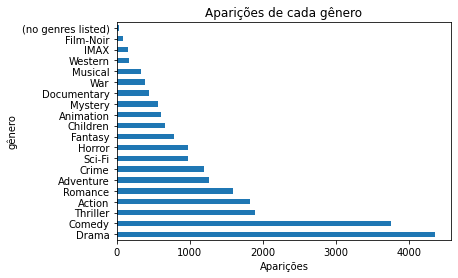

In [11]:
import matplotlib.pyplot as plt

generos_aparicoes.plot.barh()
plt.title("Aparições de cada gênero")
plt.xlabel('Aparições')
plt.ylabel('gênero')
plt.show()


Para melhor visualizaçao foi utilizado o **plot.barh**

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html

#Não esqueça de compartilhar a solução dos seus desafios com nossos instrutores, seja no twitter ou linkedin. Boa sorte!